# Exercise 3 - Sampling

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing
- To introduce uniform quantization

In [1]:
import os
os.makedirs('results/ex3', exist_ok=True)

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 3.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900"/>
<center>Figure 3.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 3.2. 

<img src="img/ex2_2.svg" alt="drawing" width="900"/>
<center>Figure 3.2: Frequency domain representation of $x(t)$ and $s(t)$</center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900"/>
<center>Figure 3.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $f_s=8000$ Hz and varying:

$(\text{i}) \:  f=150$ Hz, $\quad  (\text{ii}) \: f=300$ Hz, $\quad (\text{iii}) \: f=600$ Hz 

$(\text{iv}) \:  f=7400$ Hz, $\quad (\text{v}) \:  f=7700$ Hz $\:$ and $\: (\text{vi}) \:  f=7850$ Hz

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal


def plot_waves(signals, labels, title='', xlabel='', ylabel='', **kwargs):
    fig, ax = plt.subplots()

    for (t, x), label in zip(signals, labels):
        ax.plot(t, x, label=label, **kwargs)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.legend()
    ax.grid()
    plt.show()

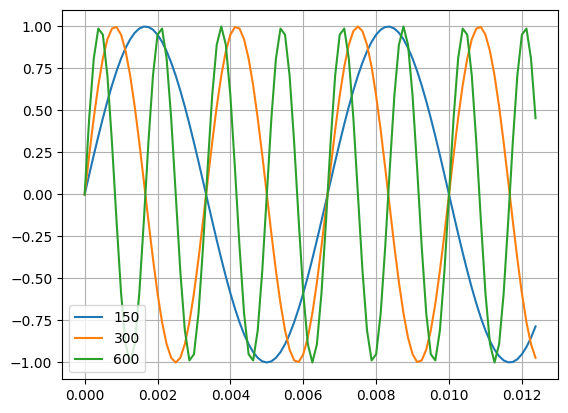

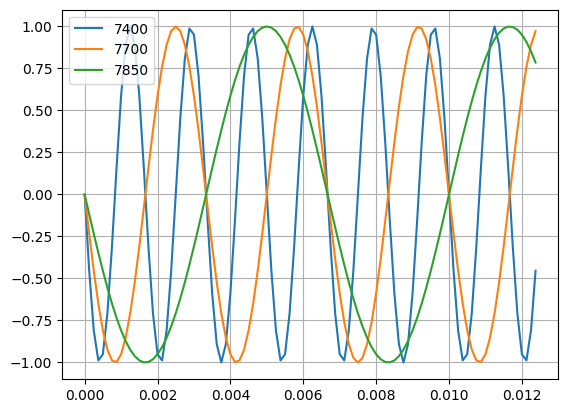

In [3]:
fs = 8000
fsig = [150, 300, 600, 7400, 7700, 7850]# change the value of fsig for parts (i) to (vi)
Nsamp = 100
signals = [sinegen(fs, fsignal, Nsamp) for fsignal in fsig]

plot_waves(signals[0:3], list(map(str, fsig[0:3])))
plot_waves(signals[3:], list(map(str, fsig[3:])))
# plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
#plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
    # plot_wave(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')

The plots created above (e.g. `ex3_sine_150_hz.pdf`) will have also been saved to the `/results/ex3/` folder so you now have a record of all the plots.

**Question 3.1** Describe and discuss the results for (i)-(iii) and (iv)-(vi).

**Answer 3.1**:
* the one for 150Hz is the same as the one for 7850Hz (but with a phase shift)
* the one 300Hz is same as the phase shifted one for 7700Hz
* the one for 600Hz is the same as the phase shifted on for 7400Hz

**Question 3.2** Predict the results for frequencies $f=24150$ Hz, $\: f=24300$ Hz and $\: f=24600$ Hz and confirm your prediction with Python.

**Answer 3.2**:
* $f = 24150Hz$ -> $150Hz$
* $f = 24300Hz$ -> $300Hz$
* $f = 24600Hz$ -> $600Hz$

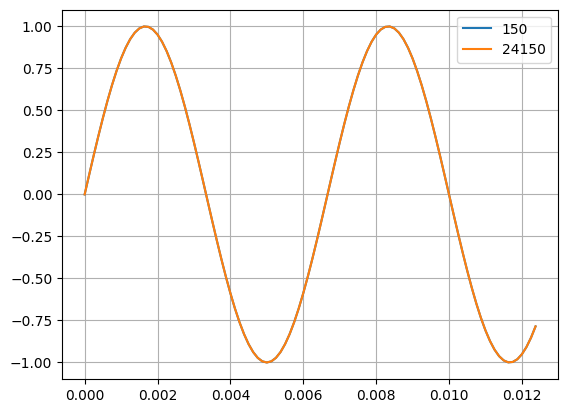

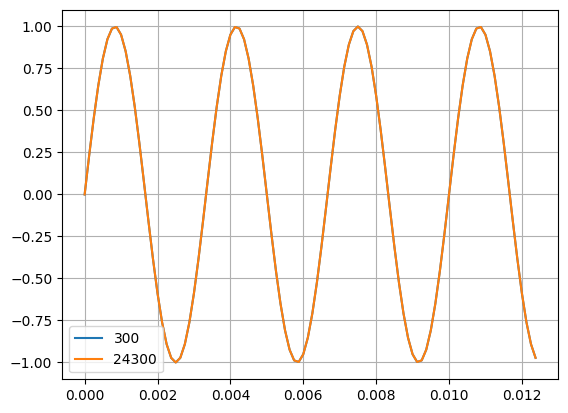

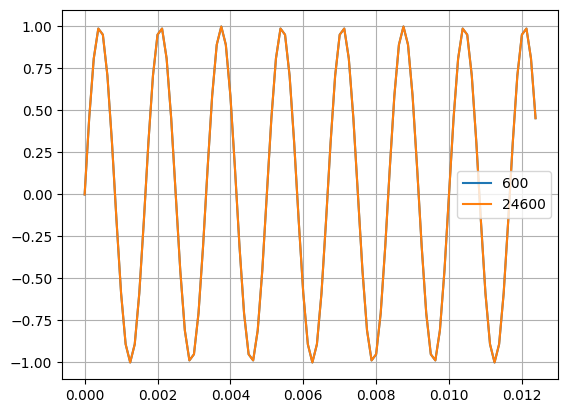

In [4]:
fs = 8000
fsig150 = [150, 24150]
fsig300 = [300, 24300]
fsig600 = [600, 24600]# change the value of fsig for parts (i) to (vi)
Nsamp = 100
signals150 = [sinegen(fs, fsignal, Nsamp) for fsignal in fsig150]
signals300 = [sinegen(fs, fsignal, Nsamp) for fsignal in fsig300]
signals600 = [sinegen(fs, fsignal, Nsamp) for fsignal in fsig600]

plot_waves(signals150, ['150', '24150'])
plot_waves(signals300, ['300', '24300'])
plot_waves(signals600, ['600', '24600'])

**Question 3.3** Consider $x(t)=\cos(100\pi t)$

$\quad$(a) Determine the minimum sampling rate to avoid aliasing

$\quad$(b) Write down an expression for $x[n]$ if a sampling frequency of 200 Hz is used.

$\quad$(c) Write down an expression for $x[n]$ if a sampling frequency of 75 Hz is used.

**Answer 3.3**:
*(a)* the freqency is $\omega = 100 \pi$ and therefore $f = 50Hz$.
Therefore we need at $f_s \geq 2 * 50Hz = 100Hz$

*(b)* $x[n] = x(n*T_s) = x(n*f/f_s) = cos(n * \pi/2)$ (where $F = f/f_s$ is the normalized frequency in cycles/sample)

*(c)* $x[n] = cos(4/3 * \pi * n)$

**Question 3.4** If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

**Answer 3.4**:
$$\Omega = \omega / f_s = 2 * \pi * f/f_s$$

-->

$$\Omega = 2 * \pi * 1200/48000 = 0.05 * \pi$$

**Question 3.5** Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?


**Answer 3.5**

$$\pi/4 = 2 \pi * f/f_s$$

-->

$$f = 1/8 * f_s$$

### Uniform quantization change to Q

Sampling is the process by which a continuous-*time* signal, $x(t)$,  becomes a discrete-*time* signal, $x[n]$. Quantization, on the other hand, is the process by which a signal with continuous amplitude is made to assume discrete amplitudes from a defined set of **quantization levels**.

Let us consider a signal $x(t)$ with amplitudes contained in the range $\pm A$. It is quantized using a simple uniform quantizer with $Q$ equally-spaced quantization levels such that the quantization step is $W=\frac{2A}{Q-1}$. The quantized signal $x_q(t)$ is obtained by rounding the amplitude of $x(t)$ to the closest quantization level, or equivalently
$$x_q(t)=W\cdot \text{round}\big(\frac{x(t)}{W}\big)$$

For example, for $A=10$ and $N=21$, the quantization step is $W=1$ and an amplitude of $x(\tau)=9.2$ would lead to $x_q(\tau)=9$.

The quantization error is the difference between the original signal $x(t)$ and the quantized signal $x_q(t)$. 

<img src="img/ex3_quant.svg" alt="drawing" width="900"/>
<center>Figure 3.4: The sampling and quantization processes</center>

**Question 3.6** For the example above ($A=10$, $Q=21$, and $W=1$), give the maximum and minimum values that the quantization error can take.

**Answer 3.6**
Maximum error: 0.5
Minimum errog: 0.0

**Question 3.7** Implement the simple quantizer described above using your own `quantizer` function in the cell below. Plot a sine wave of amplitude $10$ quantized using $21$ levels.

In [5]:
def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels

    # add your code here
    
    return y
    

In [30]:
def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels
    W = 2 * dynrange / (N - 1)
    round_to = 0
    decimals = list(filter(lambda x: x != '0', str(W).split('.')))
    if (len(decimals) > 1):
        round_to = len(decimals[1])
    return W * np.round(x/W, round_to)

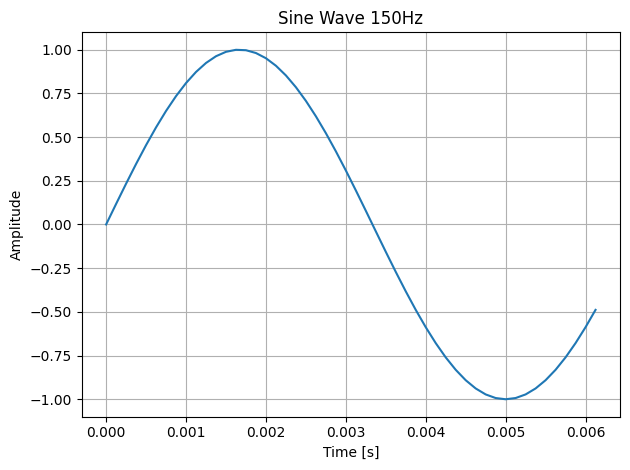

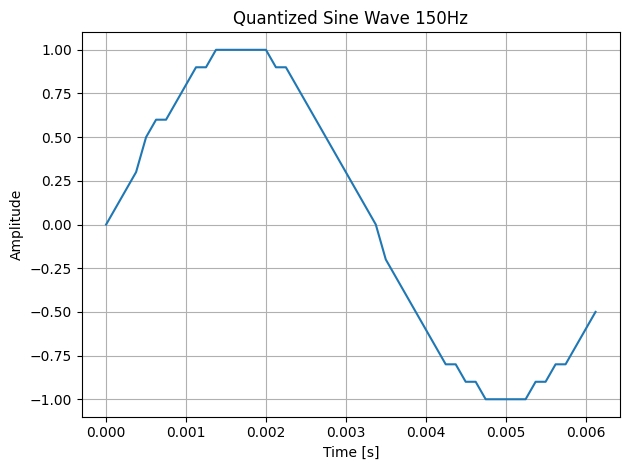

In [32]:
# plot a quantized sine wave here
fs = 8000
fsignal = 150
Nsamp = 50
t, x = sinegen(fs, fsignal, Nsamp)
x = x
x2 = quantizer(x, 1, 21)

plt = plot_signal(t, x, title='Sine Wave ' + str(fsignal) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt = plot_signal(t, x2, title='Quantized Sine Wave ' + str(fsignal) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

**Question 3.8** Plot the quantization error for the sine wave in Question 3.7. Does your result match your answer to Question 3.6? What is the root mean square (RMS) error? Compare this to Exercise 8 of Problem Sheet 3.

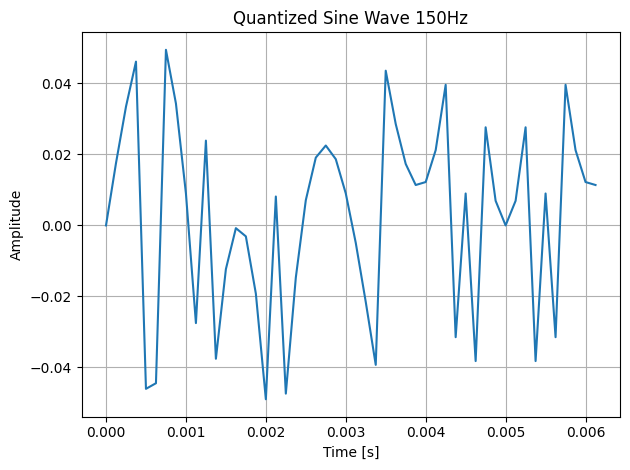

In [33]:
plt = plot_signal(t, x - x2, title='Quantized Sine Wave ' + str(fsignal) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')